# KNN Exercises

### Exercises

### Continue working in your model file with the titanic dataset.

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())

In [6]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [7]:
train.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1


In [10]:
x_cols = ['pclass', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [11]:
X_train.head()

,pclass,alone,fare
583,1,1,40.1250
165,3,0,20.5250
50,3,0,39.6875
259,2,0,26.0000
306,1,1,110.8833


In [12]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

# 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       307
           1       0.85      0.71      0.77       191

    accuracy                           0.84       498
   macro avg       0.84      0.82      0.83       498
weighted avg       0.84      0.84      0.84       498



In [14]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.837278,0.850000,0.841365,0.843639,0.842157
recall,0.921824,0.712042,0.841365,0.816933,0.841365
f1-score,0.877519,0.774929,0.841365,0.826224,0.838172
support,307.000000,191.000000,0.841365,498.000000,498.000000


In [15]:
confusion_matrix(y_train, y_pred)

array([[283,  24],
       [ 55, 136]])

In [16]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,283,24
1,55,136


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
# Lets be nicer and say that the "positive" outcome is survival = 1
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP 

(283, 24, 55, 136)

In [18]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [19]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.8413654618473896
Precision: 0.85
Recall: 0.7120418848167539
True Positive Rate: 0.7120418848167539
True Negative Rate: 0.9218241042345277
False Positive Rate: 0.0781758957654723
False Negative Rate: 0.2879581151832461
F1 Score: 0.7749287749287749
Support (0): 191
Support (1): 307


### 4. Run through steps 2-4 setting k to 10

In [20]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.729223,0.720000,0.726908,0.724611,0.725685
recall,0.885993,0.471204,0.726908,0.678599,0.726908
f1-score,0.800000,0.569620,0.726908,0.684810,0.711642
support,307.000000,191.000000,0.726908,498.000000,498.000000


In [21]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,272,35
1,101,90


### 5. Run through setps 2-4 setting k to 20

In [22]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.695652,0.672897,0.690763,0.684275,0.686925
recall,0.885993,0.376963,0.690763,0.631478,0.690763
f1-score,0.779370,0.483221,0.690763,0.631296,0.665787
support,307.000000,191.000000,0.690763,498.000000,498.000000


In [23]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,272,35
1,119,72


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### 7. Which model performs best on our out-of-sample data from validate?

### Visualize Performance as a function of k

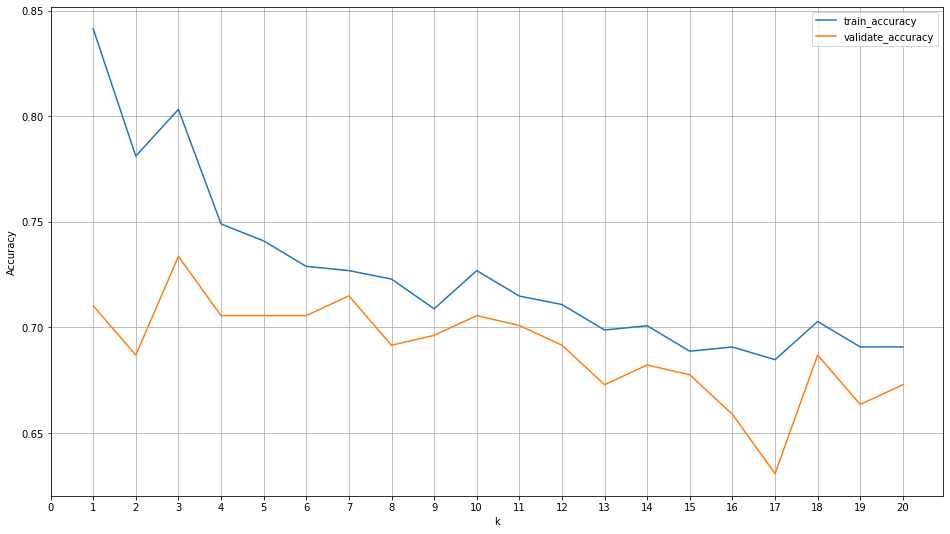

In [24]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()